In [1]:
import pandas as pd
import numpy as np 
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn import preprocessing, model_selection, metrics
import seaborn as sns


color = sns.color_palette()
%matplotlib inline



In [2]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
sub=pd.read_csv('sample_submission.csv')

In [3]:
train

,ID,target,48df886f9,0deb4b6a8,34b15f335,a8cb14b00,2f0771a37,30347e683,d08d1fbe3,6ee66e115,...,3ecc09859,9281abeea,8675bec0b,3a13ed79a,f677d4d13,71b203550,137efaa80,fb36b89d9,7e293fbaf,9fc776466
0,000d6aaf2,38000000.00,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
1,000fbd867,600000.00,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
2,0027d6b71,10000000.00,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
3,0028cbf45,2000000.00,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
4,002a68644,14400000.00,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
5,002dbeb22,2800000.00,0.0,0,0.0,0,0,0,0,0,...,12000.0,5600000.0,20000000.0,0,0,0,0,0,0,11000
6,003925ac6,164000.00,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,40000,0,0,0
7,003eb0261,600000.00,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
8,004b92275,979000.00,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,4000000.0,0,0,0,0,0,0,0
9,0067b4fef,460000.00,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,400000


In [4]:
test

,ID,48df886f9,0deb4b6a8,34b15f335,a8cb14b00,2f0771a37,30347e683,d08d1fbe3,6ee66e115,20aa07010,...,3ecc09859,9281abeea,8675bec0b,3a13ed79a,f677d4d13,71b203550,137efaa80,fb36b89d9,7e293fbaf,9fc776466
0,000137c73,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000e+00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,00021489f,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000e+00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,0004d7953,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000e+00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,00056a333,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000e+00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,00056d8eb,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000e+00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
5,0005fc190,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000e+00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
6,000787e86,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000e+00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
7,0008510a0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000e+00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
8,000895faf,0.0,0.0,2.461712e+07,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000e+00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
9,000986fba,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,12675000.0,...,0.0,0.000000e+00,13333333.34,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [5]:
sub

,ID,target
0,000137c73,5.944923e+06
1,00021489f,5.944923e+06
2,0004d7953,5.944923e+06
3,00056a333,5.944923e+06
4,00056d8eb,5.944923e+06
5,0005fc190,5.944923e+06
6,000787e86,5.944923e+06
7,0008510a0,5.944923e+06
8,000895faf,5.944923e+06
9,000986fba,5.944923e+06


In [6]:
train['48df886f9'].describe()

count    4.459000e+03
mean     1.465493e+04
std      3.893298e+05
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.000000e+07
Name: 48df886f9, dtype: float64

In [7]:
train

,ID,target,48df886f9,0deb4b6a8,34b15f335,a8cb14b00,2f0771a37,30347e683,d08d1fbe3,6ee66e115,...,3ecc09859,9281abeea,8675bec0b,3a13ed79a,f677d4d13,71b203550,137efaa80,fb36b89d9,7e293fbaf,9fc776466
0,000d6aaf2,38000000.00,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
1,000fbd867,600000.00,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
2,0027d6b71,10000000.00,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
3,0028cbf45,2000000.00,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
4,002a68644,14400000.00,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
5,002dbeb22,2800000.00,0.0,0,0.0,0,0,0,0,0,...,12000.0,5600000.0,20000000.0,0,0,0,0,0,0,11000
6,003925ac6,164000.00,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,40000,0,0,0
7,003eb0261,600000.00,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
8,004b92275,979000.00,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,4000000.0,0,0,0,0,0,0,0
9,0067b4fef,460000.00,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,400000


In [8]:
train.a04684f1f.describe()

count    4.459000e+03
mean     1.509253e+05
std      2.790982e+06
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      7.600000e+07
Name: a04684f1f, dtype: float64

In [9]:
train.target.describe()

count    4.459000e+03
mean     5.944923e+06
std      8.234312e+06
min      3.000000e+04
25%      6.000000e+05
50%      2.260000e+06
75%      8.000000e+06
max      4.000000e+07
Name: target, dtype: float64

In [10]:
import seaborn as sns


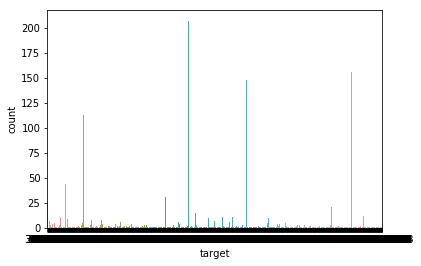

In [11]:
sns.countplot(x=train.target)

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

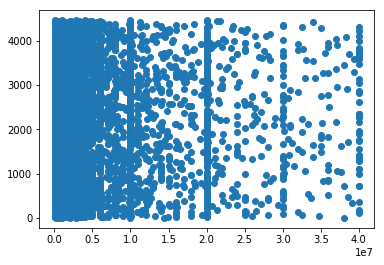

In [13]:
plt.scatter(x=train.target,y=train.index)
plt.show()

In [14]:
range(train.shape[0])

range(0, 4459)

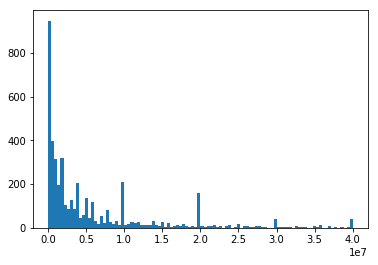

In [15]:

plt.hist(train['target'].values,bins=100)
plt.show()

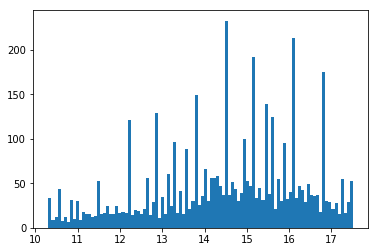

In [16]:
plt.hist(np.log1p(train['target'].values),bins=100)
plt.show()

In [17]:
#checking for missing values


In [18]:
missing = train.isnull().sum(axis=0).reset_index()
missing.columns = ['column_name', 'missing_count']
missing = missing[missing['missing_count']>0]
missing=missing.sort_values(by='missing_count')
missing

,column_name,missing_count


In [19]:
missing.head()


,column_name,missing_count


In [20]:
train.shape

(4459, 4993)

In [21]:
missing

,column_name,missing_count


In [22]:
dtype = train.dtypes.reset_index()


In [23]:
dtype

,index,0
0,ID,object
1,target,float64
2,48df886f9,float64
3,0deb4b6a8,int64
4,34b15f335,float64
5,a8cb14b00,int64
6,2f0771a37,int64
7,30347e683,int64
8,d08d1fbe3,int64
9,6ee66e115,int64


In [24]:

dtype.columns = ["Count", "Column Type"]

In [25]:
dtype

,Count,Column Type
0,ID,object
1,target,float64
2,48df886f9,float64
3,0deb4b6a8,int64
4,34b15f335,float64
5,a8cb14b00,int64
6,2f0771a37,int64
7,30347e683,int64
8,d08d1fbe3,int64
9,6ee66e115,int64


In [26]:
dtype.groupby('Column Type').aggregate('count').reset_index()

,Column Type,Count
0,int64,3147
1,float64,1845
2,object,1


In [27]:
uniquedp=train.nunique().reset_index()


In [28]:
uniquedp

,index,0
0,ID,4459
1,target,1413
2,48df886f9,32
3,0deb4b6a8,5
4,34b15f335,29
5,a8cb14b00,3
6,2f0771a37,6
7,30347e683,25
8,d08d1fbe3,6
9,6ee66e115,6


In [29]:
uniquedp.columns=['column_name','unique_number']


In [30]:
constant=uniquedp[uniquedp['unique_number']==1]

In [31]:
constant

,column_name,unique_number
28,d5308d8bc,1
35,c330f1a67,1
38,eeac16933,1
59,7df8788e8,1
70,5b91580ee,1
179,6f29fbbc7,1
183,46dafc868,1
233,ae41a98b6,1
261,f416800e9,1
296,6d07828ca,1


In [46]:
from scipy.stats import spearmanr
import warnings
warnings.filterwarnings("ignore")

labels = []
values = []
for col in train.columns:
    if col not in ["ID", "target"]:
        labels.append(col)
        values.append(spearmanr(train[col].values, train["target"].values)[0])
corr = pd.DataFrame({'col_labels':labels, 'corr_values':values})
corr = corr.sort_values(by='corr_values')
 
corr= corr[(corr['corr_values']>0.1) | (corr['corr_values']<-0.1)]

In [47]:
corr

,col_labels,corr_values
216,77eb013ca,-0.116095
1908,a60027bb4,-0.115835
1378,3adf5e2b5,-0.114185
220,186b87c05,-0.113428
2232,f8b733d3f,-0.113011
2158,715fa74a4,-0.112752
2471,08af3dd45,-0.112729
3595,7b1ddbabf,-0.112540
2102,adadb9a96,-0.112109
2870,8485abcab,-0.111304


In [54]:
 columns_to_use=corr[(corr['corr_values']>0.11) | (corr['corr_values']<-0.11)].col_labels.tolist()
    

In [55]:
columns_to_use

['77eb013ca',
 'a60027bb4',
 '3adf5e2b5',
 '186b87c05',
 'f8b733d3f',
 '715fa74a4',
 '08af3dd45',
 '7b1ddbabf',
 'adadb9a96',
 '8485abcab',
 'c7ae29e66',
 '4f2f6b0b3',
 '67f9e982f']

In [56]:
temp=train[columns_to_use]

In [81]:
temp

,77eb013ca,a60027bb4,3adf5e2b5,186b87c05,f8b733d3f,715fa74a4,08af3dd45,7b1ddbabf,adadb9a96,8485abcab,c7ae29e66,4f2f6b0b3,67f9e982f
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,160000.0,0.0,0.0


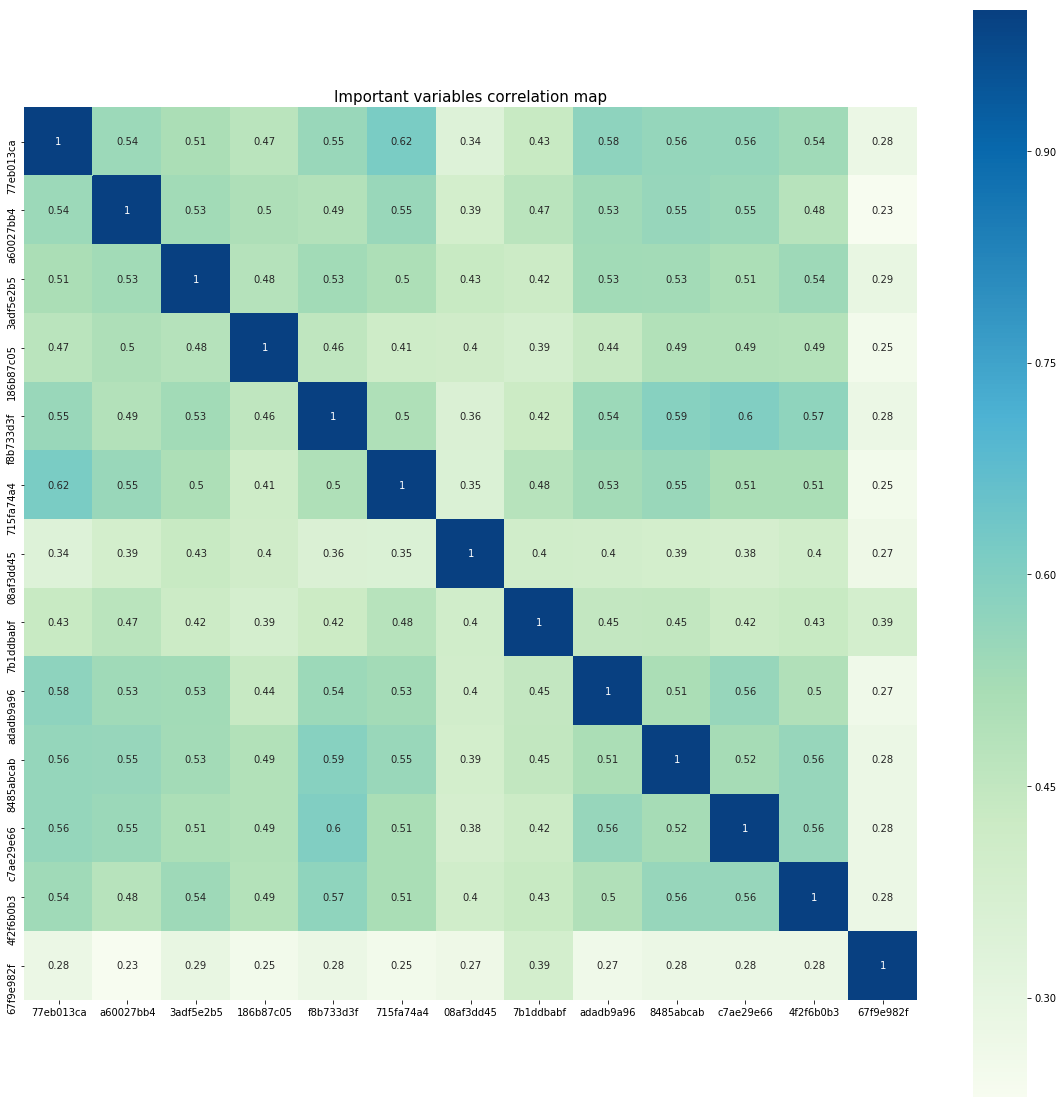

In [87]:
corrmat = temp.corr(method='spearman')
f, ax = plt.subplots(figsize=(20, 20))

# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=1., square=True, cmap="GnBu", annot=True)
plt.title("Important variables correlation map", fontsize=15)
plt.show()


In [92]:
train_X=train.drop(constant.column_name.tolist()+['ID','target'],axis=1)
test_X=test.drop(constant.column_name.tolist()+['ID'],axis=1)
train_y=np.log1p(train['target'].values)

In [93]:
train_X

,48df886f9,0deb4b6a8,34b15f335,a8cb14b00,2f0771a37,30347e683,d08d1fbe3,6ee66e115,20aa07010,dc5a8f1d8,...,3ecc09859,9281abeea,8675bec0b,3a13ed79a,f677d4d13,71b203550,137efaa80,fb36b89d9,7e293fbaf,9fc776466
0,0.0,0,0.0,0,0,0,0,0,0.00,0.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
1,0.0,0,0.0,0,0,0,0,0,2200000.00,0.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
2,0.0,0,0.0,0,0,0,0,0,0.00,0.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
3,0.0,0,0.0,0,0,0,0,0,0.00,0.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
4,0.0,0,0.0,0,0,0,0,0,2000000.00,0.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
5,0.0,0,0.0,0,0,0,0,0,17020000.00,0.0,...,12000.0,5600000.0,20000000.0,0,0,0,0,0,0,11000
6,0.0,0,0.0,0,0,0,0,0,0.00,0.0,...,0.0,0.0,0.0,0,0,0,40000,0,0,0
7,0.0,0,0.0,0,0,0,0,0,0.00,0.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
8,0.0,0,0.0,0,0,0,0,0,58000.00,0.0,...,0.0,0.0,4000000.0,0,0,0,0,0,0,0
9,0.0,0,0.0,0,0,0,0,0,0.00,0.0,...,0.0,0.0,0.0,0,0,0,0,0,0,400000


In [98]:
import lightgbm as lgb

In [99]:
from sklearn import ensemble
model = ensemble.ExtraTreesRegressor(n_estimators=200,max_depth=20,max_features=0.5,n_jobs=-1,random_state=0)
model.fit(train_X,train_y)

ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=20,
          max_features=0.5, max_leaf_nodes=None, min_impurity_decrease=0.0,
          min_impurity_split=None, min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,
          oob_score=False, random_state=0, verbose=0, warm_start=False)

In [101]:
def run_lgb(train_X,train_y,val_X,val_y,test_X):
    params={"objective" : "regression",
        "metric" : "rmse",
        "num_leaves" : 30,
        "learning_rate" : 0.01,
        "bagging_fraction" : 0.7,
        "feature_fraction" : 0.7,
        "bagging_frequency" : 5,
        "bagging_seed" : 2018,
        "verbosity" : -1}
    lgtrain=lgb.Dataset(train_X,label=train_y)
    lgval=lgb.Dataset(val_X,label=val_y)
    evals_result={}
    model=lgb.train(params,lgtrain,1000,valid_sets=[lgval],early_stopping_rounds=100,verbose_eval=200,evals_result=evals_result)
    pred_test_y=model.predict(test_X,num_iteration=model.best_iteration)
    return pred_test_y,model,evals_result

In [103]:
kf=model_selection.KFold(n_splits=5,shuffle=True,random_state=2014)
pred_test_full=0
for dev_index,val_index in kf.split(train_X):
    dev_X, val_X = train_X.loc[dev_index,:], train_X.loc[val_index,:]
    dev_y, val_y = train_y[dev_index], train_y[val_index]
    pred_test, model, evals_result = run_lgb(dev_X, dev_y, val_X, val_y, test_X)
    pred_test_full += pred_test
pred_test_full /= 5.
pred_test_full = np.expm1(pred_test_full)

Training until validation scores don't improve for 100 rounds.
[200]	valid_0's rmse: 1.45198
[400]	valid_0's rmse: 1.41971
[600]	valid_0's rmse: 1.41872
Early stopping, best iteration is:
[694]	valid_0's rmse: 1.41789
Training until validation scores don't improve for 100 rounds.
[200]	valid_0's rmse: 1.42809
[400]	valid_0's rmse: 1.40274
Early stopping, best iteration is:
[486]	valid_0's rmse: 1.40151
Training until validation scores don't improve for 100 rounds.
[200]	valid_0's rmse: 1.43923
[400]	valid_0's rmse: 1.40759
Early stopping, best iteration is:
[437]	valid_0's rmse: 1.40578
Training until validation scores don't improve for 100 rounds.
[200]	valid_0's rmse: 1.4966
[400]	valid_0's rmse: 1.47325
Early stopping, best iteration is:
[459]	valid_0's rmse: 1.47174
Training until validation scores don't improve for 100 rounds.
[200]	valid_0's rmse: 1.49913
[400]	valid_0's rmse: 1.47206
[600]	valid_0's rmse: 1.47069
Early stopping, best iteration is:
[585]	valid_0's rmse: 1.47042


{'valid_0': defaultdict(list,
             {'rmse': [1.7876566219363552,
               1.783750423947707,
               1.7795168564102208,
               1.7761388813393681,
               1.771943681950431,
               1.7685659873955297,
               1.7646422909642119,
               1.7607637968429646,
               1.7570112725826037,
               1.7536048229297418,
               1.7500881057194433,
               1.7464843245115589,
               1.74330448647467,
               1.7401059689806138,
               1.736987630995136,
               1.7337956488148172,
               1.7303524836681092,
               1.727013954270827,
               1.723786020728364,
               1.7206285608565315,
               1.717181065586602,
               1.71398357696095,
               1.7110291445660206,
               1.7080945426055802,
               1.7055295354439224,
               1.7027528239084748,
               1.6998517746392026,
               1.6972094584

In [106]:

pred_test

array([14.41054425, 14.46920702, 14.41519154, ..., 13.61960701,
       13.50337703, 14.49668632])

In [107]:
sub=pd.DataFrame({"ID":test['ID'].values})
sub["target"]=pred_test_full
sub.to_csv('baseline_lgb.csv',index=False)